<a href="https://colab.research.google.com/github/ultrasmartary/MLCollege/blob/master/MLCollege_Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

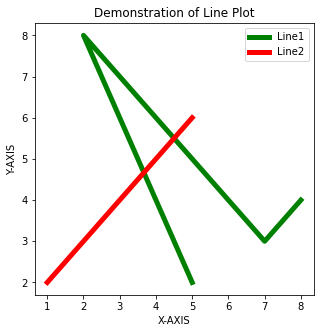

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
x=[5,2,7,8]
y=[2,8,3,4]
x1=[1,2,3,4,5]
y1=[2,3,4,5,6]
plt.plot(x,y,'g',label='Line1',linewidth=5)
plt.plot(x1,y1,'r',label='Line2',linewidth=5)
plt.xlabel("X-AXIS")
plt.ylabel('Y-AXIS')
plt.title('Demonstration of line Plot')
plt.legend()
plt.show()

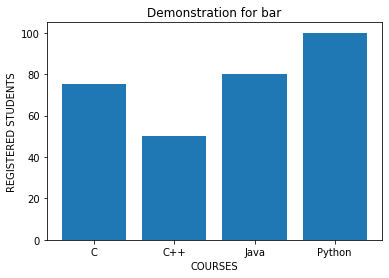

In [20]:
plt.bar(['C','C++','Java','Python'],[75,50,80,100])
plt.xlabel('COURSES')
plt.ylabel('REGISTERED STUDENTS')
plt.title('Demonstration for bar plot')
plt.show()

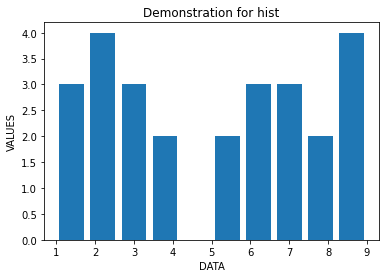

In [21]:
num=[1,1,2,3,4,5,6,7,8,9,2,2,3,9,8,7,6,6,5,4,3,7,2,1,9,9]
plt.hist(num,histtype='bar',rwidth=0.8)
plt.xlabel('DATA')
plt.ylabel('VALUES')
plt.title('Demonstration for hist plot')
plt.show()

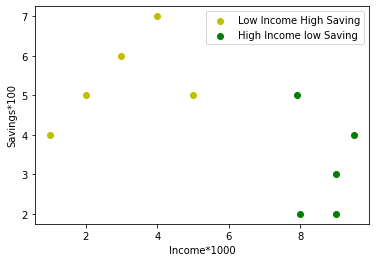

In [4]:
x=[1,2,3,4,5]
y=[4,5,6,7,5]
x1=[8,9,9.5,7.9,9]
y1=[2,3,4,5,2]
plt.scatter(x,y,label='Low Income High Saving',color='y')
plt.scatter(x1,y1,label='High Income low Saving',color='g')
plt.xlabel('Income*1000')
plt.ylabel('Savings*100')
plt.legend()
plt.show()

In [5]:
#COVID-19 Dataset Questions

In [6]:
#1)World map displaying current status of Active and Confirmed cases
#2)Plotting Number of Active , Recoverd , Confirmed and death Cases Date wise(seaborn scatter plot)
#3)Visualize countrywise data of confirmed cases on sns barplot
#4)Create a pointplot  for performing analysis of Recovery rate of four countries using seaborn (India, US, Russia,Brazil)
#5)Create a scatterplot  for performing analysis of Recovery rate of four countries using matplotlib (India, US, Russia,Brazil) 
#6)Create a pointplot  for performing analysis of Active cases of four countries (India, US, Russia,Brazil)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
covid=pd.read_csv('/content/drive/My Drive/Colab_Dataset/covid_19_clean_complete.csv',parse_dates=['Date'])
print(covid.head())
covid.tail()
covid.dtypes

  Province/State Country/Region  ...  Active             WHO Region
0            NaN    Afghanistan  ...       0  Eastern Mediterranean
1            NaN        Albania  ...       0                 Europe
2            NaN        Algeria  ...       0                 Africa
3            NaN        Andorra  ...       0                 Europe
4            NaN         Angola  ...       0                 Africa

[5 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [8]:
covid['Active']=covid['Confirmed']-covid['Recovered']-covid['Deaths']
#print(covid.head())
top=covid[(covid['Date']==covid['Date'].max())]
top
world=top.groupby('Country/Region')['Confirmed',"Active",'Recovered','Deaths'].sum().sort_values(['Active'],ascending=False).reset_index()
world

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Country/Region,Confirmed,Active,Recovered,Deaths
0,US,2739879,1829169,781970,128740
1,Brazil,1496858,477282,957692,61884
2,United Kingdom,285268,239815,1373,44080
3,India,625544,227439,379892,18213
4,Russia,660231,222287,428276,9668
...,...,...,...,...,...
182,Holy See,12,0,12,0
183,Fiji,18,0,18,0
184,Brunei,141,0,138,3
185,Barbados,97,0,90,7


In [9]:
#1)World map displaying current status of Active and Confirmed cases

import plotly.express as px
world_x=px.choropleth(world,locations='Country/Region',locationmode='country names',color='Active',hover_name='Confirmed',color_continuous_scale='Portland',range_color=[1,100000],title='WORLD:Active Cases')
world_x.show()

In [10]:
#2)Plotting Number of Active , Recoverd , Confirmed and death Cases Date wise(seaborn scatter plot)

Active_cases=covid.groupby('Date')['Date',"Active"].sum().reset_index()
Active_cases
Recovered_cases=covid.groupby('Date')['Date',"Recovered"].sum().reset_index()
Confirmed_cases=covid.groupby('Date')['Date',"Confirmed"].sum().reset_index()
Death_cases=covid.groupby('Date')['Date',"Deaths"].sum().reset_index()
Death_cases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
158,2020-06-28,502434
159,2020-06-29,506060
160,2020-06-30,511252
161,2020-07-01,516237


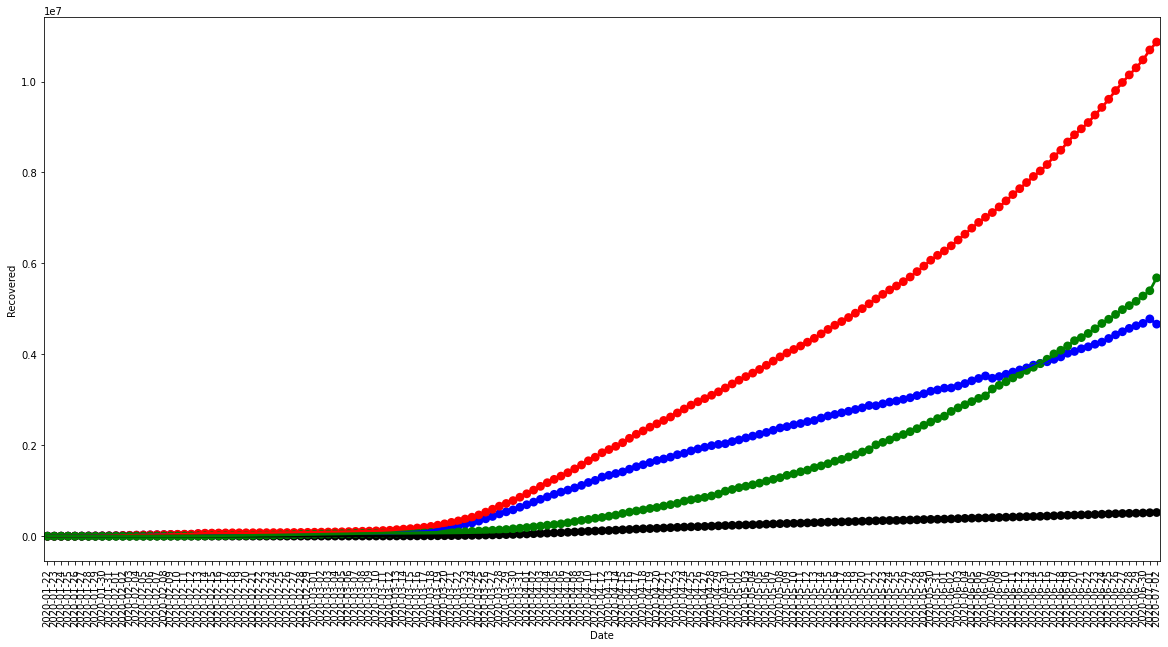

In [11]:
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.pointplot(Active_cases['Date'].dt.date,Active_cases['Active'],color='b')
sns.pointplot(Confirmed_cases['Date'].dt.date,Confirmed_cases['Confirmed'],color='r')
sns.pointplot(Death_cases['Date'].dt.date,Death_cases['Deaths'],color='k')
sns.pointplot(Recovered_cases['Date'].dt.date,Recovered_cases['Recovered'],color='g')
plt.show()

In [12]:
#3)Visualize countrywise data of confirmed cases on sns barplot

top_confirm=top.groupby('Country/Region')["Confirmed"].sum().sort_values(ascending=False).reset_index()
top_20=top_confirm.head(20)
top_20

,Country/Region,Confirmed
0,US,2739879
1,Brazil,1496858
2,Russia,660231
3,India,625544
4,Peru,292004
5,United Kingdom,285268
6,Chile,284541
7,Spain,250103
8,Italy,240961
9,Mexico,238511


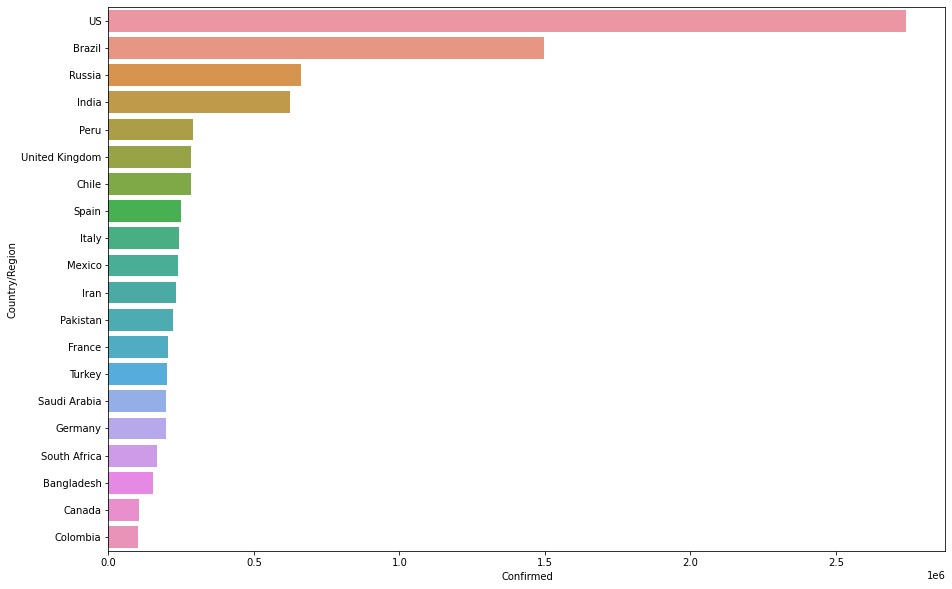

In [13]:
plt.figure(figsize=[15,10])
sns.barplot(top_20['Confirmed'],top_20["Country/Region"])
plt.show()

In [14]:
#4)Create a pointplot  for performing analysis of Recovery rate of four countries using seaborn (India, US, Russia,Brazil)

India=covid[covid['Country/Region']=='India']
India=India.groupby('Date')["Recovered",'Active'].sum().reset_index()
India

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
158,2020-06-28,321723,210120
159,2020-06-29,334822,215125
160,2020-06-30,347912,220169
161,2020-07-01,359860,226947


In [15]:
US=covid[covid['Country/Region']=='US']
US=US.groupby('Date')["Recovered",'Active'].sum().reset_index()
US

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active
0,2020-01-22,0,1
1,2020-01-23,0,1
2,2020-01-24,0,2
3,2020-01-25,0,2
4,2020-01-26,0,5
...,...,...,...
158,2020-06-28,685164,1737770
159,2020-06-29,705203,1758754
160,2020-06-30,720631,1788351
161,2020-07-01,729994,1829489


In [16]:
Russia=covid[covid['Country/Region']=='Russia']
Russia=Russia.groupby('Date')["Recovered",'Active'].sum().reset_index()
Russia

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
158,2020-06-28,398436,226067
159,2020-06-29,402778,228316
160,2020-06-30,411973,225650
161,2020-07-01,422235,221723


In [17]:
Brazil=covid[covid['Country/Region']=='Brazil']
Brazil=Brazil.groupby('Date')["Recovered",'Active'].sum().reset_index()
Brazil

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
158,2020-06-28,746018,540503
159,2020-06-29,757811,552070
160,2020-06-30,788318,554129
161,2020-07-01,817642,570479


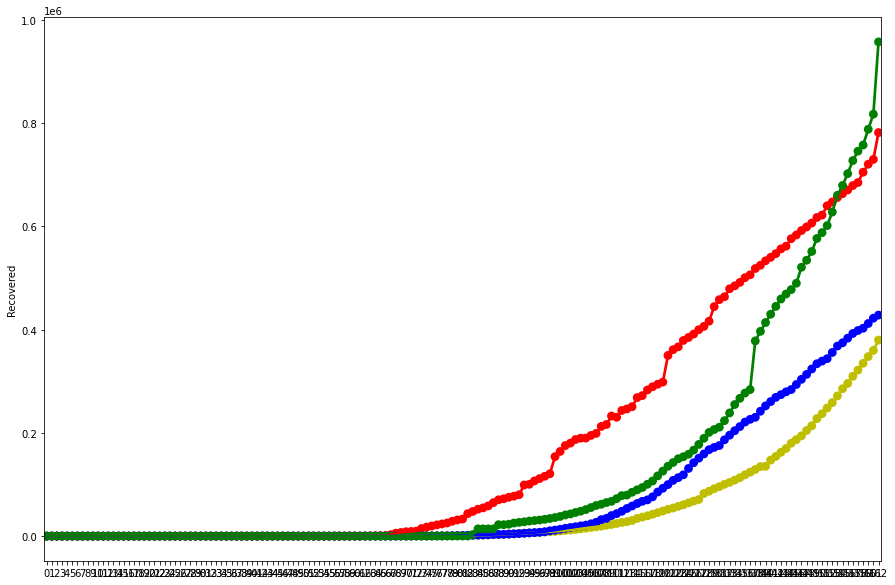

In [18]:
plt.figure(figsize=[15,10])
sns.pointplot(India.index,India['Recovered'],color='y')
sns.pointplot(US.index,US['Recovered'],color='r')
sns.pointplot(Russia.index,Russia['Recovered'],color='b')
sns.pointplot(Brazil.index,Brazil['Recovered'],color='g')
plt.show()